# Numerical Method Notes

- ### Bisection method code snippet

	 x1		 x2		 x0		 f(x0)


1	 11.500000	 12.000000	 11.500000	 2.250000	
2	 11.750000	 12.000000	 11.750000	 0.562500	
3	 11.750000	 11.875000	 11.875000	 -0.234375	
4	 11.812500	 11.875000	 11.812500	 0.160156	
5	 11.812500	 11.843750	 11.843750	 -0.038086	
6	 11.828125	 11.843750	 11.828125	 0.060791	
7	 11.835938	 11.843750	 11.835938	 0.011292	
8	 11.835938	 11.839844	 11.839844	 -0.013412	
9	 11.835938	 11.837891	 11.837891	 -0.001064	
10	 11.836914	 11.837891	 11.836914	 0.005113	
11	 11.837402	 11.837891	 11.837402	 0.002024	
12	 11.837646	 11.837891	 11.837646	 0.000480	


1	 18.000000	 18.500000	 18.500000	 2.250000	
2	 18.000000	 18.250000	 18.250000	 0.562500	
3	 18.125000	 18.250000	 18.125000	 -0.234375	
4	 18.125000	 18.187500	 18.187500	 0.160156	
5	 18.156250	 18.187500	 18.156250	 -0.038086	
6	 18.156250	 18.171875	 18.171875	 0.060791	
7	 18.156250	 18.164062	 18.164062	 0.011292	
8	 18.160156	 18.164062	 18.160156	 -0.013412	
9	 18.162109	 18.164062	 18.162109	 -0.0010

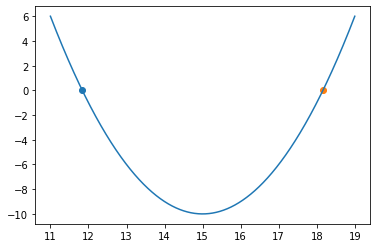

In [32]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

# define a function
f = lambda x: (x-15)**2 -10

# coarse search for probable multiple soln.
xv=[]
a=0
b=100
step = 1
for i in np.arange(a,b,step):
    if f(i)*f(i+step)<0:
        xv.append((i,i+step))

# fine search for probable soln.
sol=[]

print("\t x1\t\t x2\t\t x0\t\t f(x0)")

for i in xv:
    # initial points
    x1,x2=i[0],i[1]
    
    print("\n")
    
    k=0
    # looping start
    while True:
        # count
        k+=1
        
        # bisection point
        x0=(x1+x2)/2

        # if soln is in left part
        if f(x1)*f(x0)<0:
            x1=x1
            x2=x0
        
        # if soln is in right part    
        else:
            x1=x0
            x2=x2
        
        print("%i\t %.6f\t %.6f\t %.6f\t %.6f\t" %(k,x1,x2,x0,f(x0)))
        
        '''
        debugging
        print(f"f({x0})={f(x0)}")
        ''' 

        # required accuracy
        accuracy = 10**(-3)
        if abs(f(x0))<accuracy:
            sol.append(x0)
            break
            

print("\n")

if len(sol)==1:
    print(f"the solution:\t{sol[0]}")
elif len(sol)>1:
    print(f"no of solution in the range:\t{len(sol)}")
    print(f"the solutions:\t{sol}")
else:
    print("no solution in that range")


t=np.linspace(xv[0][0],xv[-1][-1],10000)
plt.plot(t,f(t))
for i in sol:
    plt.scatter(i,f(i))
plt.show()

- ### Newton-Raphson Method code snippet

Initial guess: 0


	x		f(x)
1	 7.166906	51.357368
2	10.445345	10.744885
3	11.625024	 1.390463
4	11.831051	 0.042241
5	11.837716	 0.000038


The solution: 11.837716368207913


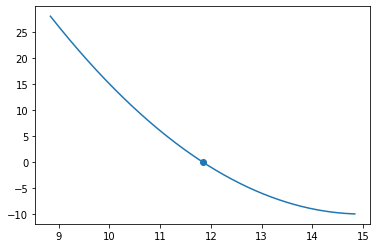

In [35]:
from math import *
import matplotlib.pyplot as plt


# define a function
f = lambda x: (x-15)**2 -10

#initial guesses
x0=float(input("Initial guess: "))
print("\n")

#definr derivative
def dfdx(x):
    h=10e-4
    return (f(x+h)-f(x))/h

def h(x):
    return -f(x)/dfdx(x)
print("\tx\t\tf(x)")

k=0
while True:
    # count
    k+=1
    x0+=h(x0)
    print("%i\t%9.6f\t%9.6f"%(k,x0,f(x0)))
    if abs(f(x0))<10**(-3):
        sol = x0
        break

print("\n")
print(f"The solution: {sol}")

t=np.linspace(sol-3,sol+3,10000)
plt.plot(t,f(t))
plt.scatter(sol,f(sol))
plt.show()

- ### Regula Falsi Method code snippet